# Лабораторная работа №3
## Исследование распределений и моментов связанных с преобразованием случайных величин


Цель: Применение распределений для преобразования случайных величин.



### Задание. 
Сгенерировать выборку точек, равномерно распределенных внутри круга
двумя способами:
1. Равномерно распределить точки внутри квадрата, внутрь которого вписана
окружность, и отфильтровать точки, лежащие за пределами окружности.
2. Генерировать точки путем задания случайного угла и расстояния от центра
окружности.
Радиус окружности R=10, размер выборки 1000 точек.


Для созданных выборок сделать следующее:

1. Создать рисунок, иллюстрирующий расположение точек сгенерированной
выборки внутри окружности;


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

1. Создать рисунок, иллюстрирующий расположение точек сгенерированной
выборки внутри окружности;


Равномерно распределить точки внутри квадрата, внутрь которого вписана
окружность, и отфильтровать точки, лежащие за пределами окружности.

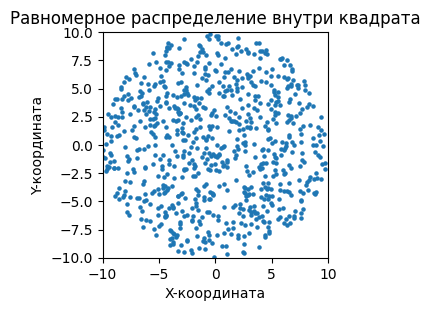

In [36]:
# Радиус окружности
R = 10
# Количество точек в выборке
n = 1000

# Генерируем случайные координаты внутри круга
x = np.random.uniform(-R, R, n)
y = np.random.uniform(-R, R, n)

# Фильтруем точки, оставляем только те, что лежат внутри окружности
inside_circle = (x**2 + y**2) <= R**2
x_inside = x[inside_circle]
y_inside = y[inside_circle]

plt.subplot(1, 2, 1)
plt.scatter(x_inside, y_inside, s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-R, R)
plt.ylim(-R, R)
plt.title("Равномерное распределение внутри квадрата")
plt.xlabel("X-координата")
plt.ylabel("Y-координата")
plt.show()

Генерировать точки путем задания случайного угла и расстояния от центра
окружности.
Радиус окружности R=10, размер выборки 1000 точек.


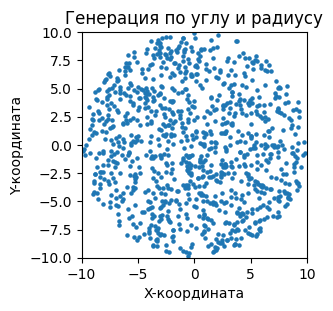

In [37]:
theta = np.random.uniform(0, 2 * np.pi, n)
r = R * np.sqrt(np.random.uniform(0, 1, n))

x_polar = r * np.cos(theta)
y_polar = r * np.sin(theta)

plt.subplot(1, 2, 2)
plt.scatter(x_polar, y_polar, s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-R, R)
plt.ylim(-R, R)
plt.title("Генерация по углу и радиусу")
plt.xlabel("X-координата")
plt.ylabel("Y-координата")
plt.show()

2. Найти выборочные средние координат точек и их дисперсию;


In [38]:
print('внутри квадрата')
print("Выборочное среднее (X):", np.mean(x_inside))
print("Выборочное среднее (Y):", np.mean(y_inside))
print("Дисперсия (X):", np.var(x_inside))
print("Дисперсия (Y):", np.var(y_inside))

внутри квадрата
Выборочное среднее (X): -0.09873632652581309
Выборочное среднее (Y): 0.05166979281068143
Дисперсия (X): 24.74746127562826
Дисперсия (Y): 24.002339596454448


In [39]:
print('по углу и радиусу')
print("Выборочное среднее (X):", np.mean(x_polar))
print("Выборочное среднее (Y):", np.mean(y_polar))
print("Дисперсия (X):", np.var(x_polar))
print("Дисперсия (Y):", np.var(y_polar))

по углу и радиусу
Выборочное среднее (X): -0.10136675592303612
Выборочное среднее (Y): -0.09576428374171304
Дисперсия (X): 23.85835020531826
Дисперсия (Y): 24.46239195974306



3. Построить график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности
(к примеру, с координатами X=20, Y=0).


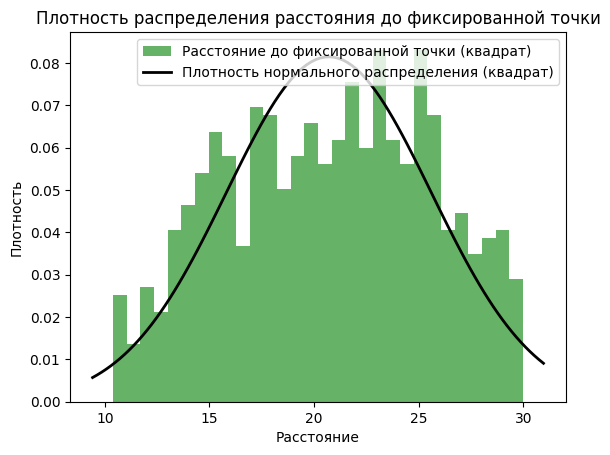

In [40]:
from scipy.stats import norm

# Фиксированная точка с координатами (X=20, Y=0)
fixed_point_x = 20
fixed_point_y = 0

# Вычисляем расстояния от случайных точек внутри круга до фиксированной точки
distances = np.sqrt((x_inside - fixed_point_x)**2 + (y_inside - fixed_point_y)**2)

# Построить гистограмму или плотность распределения расстояний
plt.hist(distances, bins=30, density=True, alpha=0.6, color='g', label='Расстояние до фиксированной точки (квадрат)')

mu, std = norm.fit(distances)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Плотность нормального распределения (квадрат)')

plt.title("Плотность распределения расстояния до фиксированной точки")
plt.xlabel("Расстояние")
plt.ylabel("Плотность")
plt.legend()
plt.show()


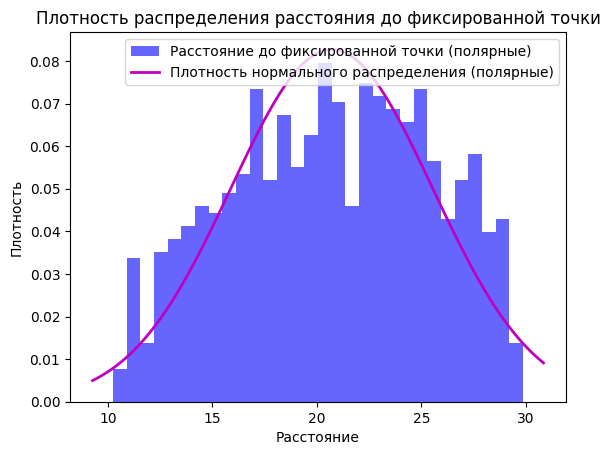

In [41]:
# Вычисляем расстояния от случайных точек по углу и радиусу до фиксированной точки
distances_polar = np.sqrt((x_polar - fixed_point_x)**2 + (y_polar - fixed_point_y)**2)

# Построить гистограмму или плотность распределения расстояний
plt.hist(distances_polar, bins=30, density=True, alpha=0.6, color='b', label='Расстояние до фиксированной точки (полярные)')

mu_polar, std_polar = norm.fit(distances_polar)
xmin_polar, xmax_polar = plt.xlim()
x_polar = np.linspace(xmin_polar, xmax_polar, 100)
p_polar = norm.pdf(x_polar, mu_polar, std_polar)
plt.plot(x_polar, p_polar, 'm', linewidth=2, label='Плотность нормального распределения (полярные)')

plt.title("Плотность распределения расстояния до фиксированной точки")
plt.xlabel("Расстояние")
plt.ylabel("Плотность")
plt.legend()
plt.show()



4. Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.

In [42]:
distances_1 = []
distances_2 = []

for i in range(n_samples):
    a,b = np.random.randint(0, n_samples-1), np.random.randint(0, n_samples-1)
    distances_1.append(dist(X[a], Y[a], X[b], Y[b]))
    distances_2.append(dist(aX[a], aY[a], aX[b], aY[b]))

distances_1.sort()
distances_2.sort()

kde_dist_1_y = gaussian_kde(distances_1).evaluate(distances_1)
kde_dist_2_y = gaussian_kde(distances_2).evaluate(distances_2)


Text(0.5, 1.0, 'Метод 1')

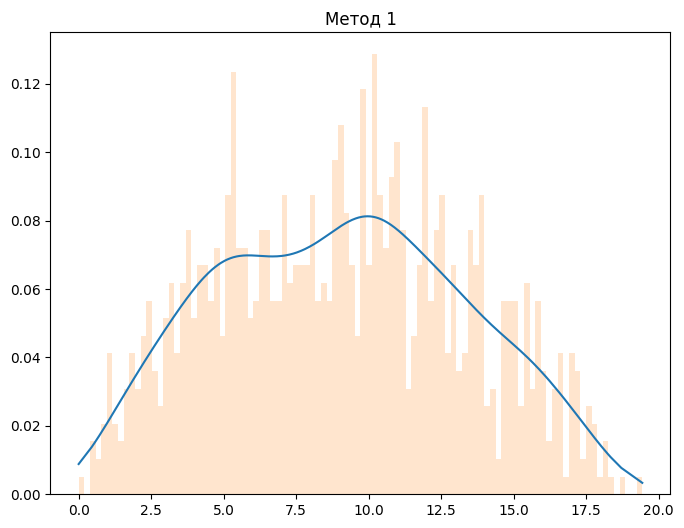

In [43]:

plt.figure(figsize=(8,6))
plt.plot(distances_1, kde_dist_1_y)
plt.hist(distances_1, bins=100, alpha=0.2, density=True)
plt.title("Метод 1")


Text(0.5, 1.0, 'Метод 2')

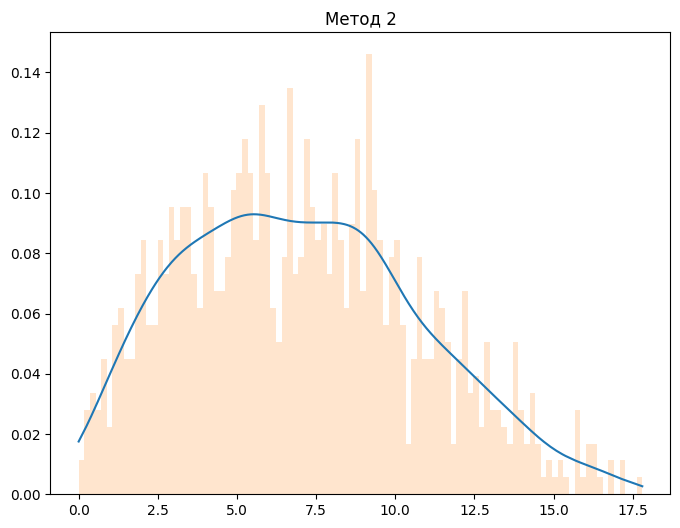

In [44]:

plt.figure(figsize=(8,6))
plt.plot(distances_2, kde_dist_2_y)
plt.hist(distances_2, bins=100, alpha=0.2, density=True)
plt.title("Метод 2")